### imports

In [1]:
!git clone https://github.com/Elena-Semerova/ru_stance_detection_twitter

Cloning into 'ru_stance_detection_twitter'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 141 (delta 36), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (141/141), 53.42 KiB | 484.00 KiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

from ru_stance_detection_twitter.data.collection.data_config import *
from ru_stance_detection_twitter.data.preprocessing.preprocess import *

### read data

In [3]:
END_OF_PATH = '_all_data.csv'

In [4]:
data_cancel_culture = pd.read_csv('data/' + TOPICS[0] + END_OF_PATH)
data_feminism = pd.read_csv('data/' + TOPICS[1] + END_OF_PATH)
data_lgbtq_plus = pd.read_csv('data/' + TOPICS[2] + END_OF_PATH)
data_ageism = pd.read_csv('data/' + TOPICS[3] + END_OF_PATH)
data_lookism = pd.read_csv('data/' + TOPICS[4] + END_OF_PATH)

In [5]:
name_data_dict = {
    TOPICS[0]: data_cancel_culture,
    TOPICS[1]: data_feminism,
    TOPICS[2]: data_lgbtq_plus,
    TOPICS[3]: data_ageism,
    TOPICS[4]: data_lookism
}

### clean data

In [6]:
for topic_name, data in name_data_dict.items():
    print('For topic: ', topic_name)
    print('\tAll data shape: ', data.shape)
    data = preprocess(data, topic_name, save=True)
    print('\tCleaned data shape: ', data.shape)
    print()

For topic:  cancel_culture
	All data shape:  (15962, 6)
	Cleaning is done
	Saving is done
	Cleaned data shape:  (15379, 4)

For topic:  feminism
	All data shape:  (525356, 6)
	Cleaning is done
	Saving is done
	Cleaned data shape:  (479881, 4)

For topic:  lgbtq_plus
	All data shape:  (1665606, 6)
	Cleaning is done
	Saving is done
	Cleaned data shape:  (1506756, 4)

For topic:  ageism
	All data shape:  (16877, 6)
	Cleaning is done
	Saving is done
	Cleaned data shape:  (16158, 4)

For topic:  lookism
	All data shape:  (14586, 6)
	Cleaning is done
	Saving is done
	Cleaned data shape:  (14034, 4)



### look on shapes of dataframes

In [7]:
NEW_END_OF_PATH = '_clean.csv'

In [8]:
data_cancel_culture = pd.read_csv('data/' + TOPICS[0] + END_OF_PATH)
data_feminism = pd.read_csv('data/' + TOPICS[1] + END_OF_PATH)
data_lgbtq_plus = pd.read_csv('data/' + TOPICS[2] + END_OF_PATH)
data_ageism = pd.read_csv('data/' + TOPICS[3] + END_OF_PATH)
data_lookism = pd.read_csv('data/' + TOPICS[4] + END_OF_PATH)

data_cancel_culture_clean = pd.read_csv('data/' + TOPICS[0] + NEW_END_OF_PATH)
data_feminism_clean = pd.read_csv('data/' + TOPICS[1] + NEW_END_OF_PATH)
data_lgbtq_plus_clean = pd.read_csv('data/' + TOPICS[2] + NEW_END_OF_PATH)
data_ageism_clean = pd.read_csv('data/' + TOPICS[3] + NEW_END_OF_PATH)
data_lookism_clean = pd.read_csv('data/' + TOPICS[4] + NEW_END_OF_PATH)

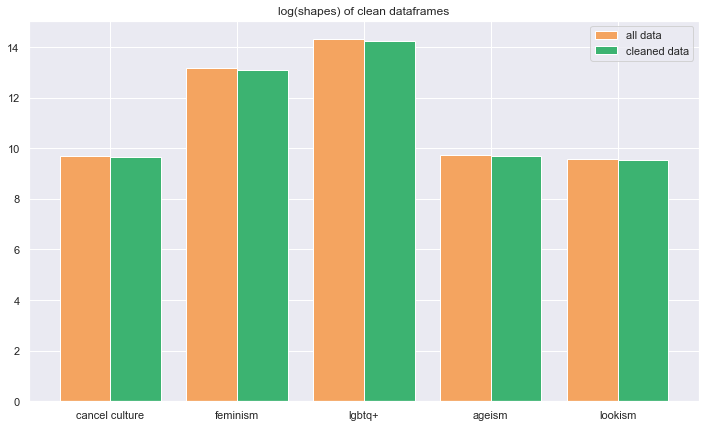

In [9]:
x = ['cancel culture', 'feminism', 'lgbtq+', 'ageism', 'lookism']
x1 = np.arange(1, 6) - 0.2
x2 = np.arange(1, 6) + 0.2

y = [data_cancel_culture.shape[0],
     data_feminism.shape[0],
     data_lgbtq_plus.shape[0],
     data_ageism.shape[0],
     data_lookism.shape[0]]

y_log = np.log1p(y)

y_clean = [data_cancel_culture_clean.shape[0],
           data_feminism_clean.shape[0],
           data_lgbtq_plus_clean.shape[0],
           data_ageism_clean.shape[0],
           data_lookism_clean.shape[0]]

y_clean_log = np.log1p(y_clean)

fig, ax = plt.subplots()

ax.bar(x1, y_log, width = 0.4, color='sandybrown', label='all data')
ax.bar(x2, y_clean_log, width = 0.4, color='mediumseagreen', label='cleaned data')

plt.xticks([i for i in range(1, 6)], x)
fig.set_figwidth(12)
fig.set_figheight(7) 
plt.title('log(shapes) of clean dataframes')
plt.legend()
plt.show()